# What is the most optimal skill to learn for Data Scientists?

### Methodology

1. Group skills to determine median salry and likelhood of being in posting
2. Visualize median sakary vs present skill demand
3. Determine id certain technilogies are more prevalent (Optiional)

In [1]:
 # Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Set Universal Theme
sns.set_theme(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, color_codes=True, rc=None)


c:\Users\PC-USER\anaconda3\envs\wcourse\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Filter data and drop NaN values
df_ds = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].dropna(subset=['salary_year_avg']).copy()

In [3]:
# Seperate each skill in the job_skills column
df_ds_exploded = df_ds.explode('job_skills')

df_ds_exploded[['job_skills', 'salary_year_avg']].head(5)

,job_skills,salary_year_avg
100,sql,228222.0
100,r,228222.0
100,python,228222.0
100,express,228222.0
116,r,114000.0


In [4]:
# Creating a table which each skill, it's count and median pay
df_skills = df_ds_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_skills = df_skills.rename(columns={'count': 'skills_count', 'median': 'average_pay'})

df_skills

,skills_count,average_pay
job_skills,,
python,3358,131867.0
sql,2463,134500.0
r,2053,126000.0
sas,1022,120000.0
tableau,989,125000.0
...,...,...
svelte,1,99150.0
lisp,1,100000.0
macos,1,147000.0


In [5]:
# Creating a new column and assigning the percentage of each skill based on how often it appears on data scientist job postings in the US
job_count = len(df_ds)

df_skills['skills_percent'] = df_skills['skills_count']/ job_count *100

df_skills

,skills_count,average_pay,skills_percent
job_skills,,,
python,3358,131867.0,73.753569
sql,2463,134500.0,54.096200
r,2053,126000.0,45.091149
sas,1022,120000.0,22.446738
tableau,989,125000.0,21.721942
...,...,...,...
svelte,1,99150.0,0.021964
lisp,1,100000.0,0.021964
macos,1,147000.0,0.021964


In [6]:
# Creating a limit to filter out the less frequent skills
min_percent = 8

df_skills = df_skills[df_skills['skills_percent'] > min_percent]

df_skills

,skills_count,average_pay,skills_percent
job_skills,,,
python,3358,131867.0,73.753569
sql,2463,134500.0,54.096200
r,2053,126000.0,45.091149
sas,1022,120000.0,22.446738
tableau,989,125000.0,21.721942
aws,768,134000.0,16.867999
spark,718,135959.5,15.769822
excel,490,124290.0,10.762135
tensorflow,474,149646.0,10.410718


Text(0.5, 1.0, 'Most In-Demand Skills for Data Scientists in the US')

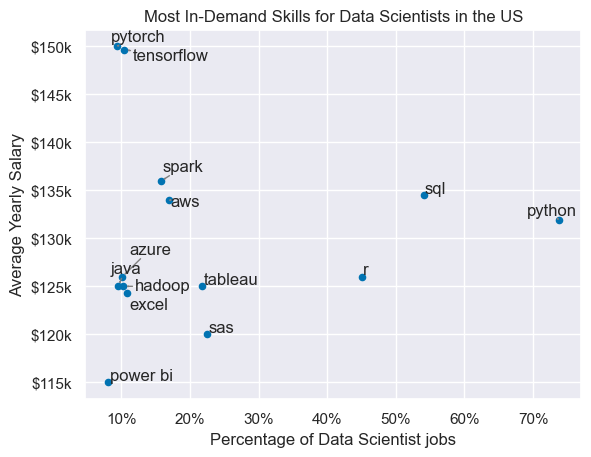

In [7]:
# Import adjustText so I can label each skill appropriately
from adjustText import adjust_text

df_skills.plot(kind='scatter', x='skills_percent', y='average_pay')

texts = []

for index, txt in enumerate(df_skills.index):
    texts.append(plt.text(df_skills['skills_percent'].iloc[index], df_skills['average_pay'].iloc[index], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Add labels and title
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0f}%'))
plt.xlabel('Percentage of Data Scientist jobs')
plt.ylabel('Average Yearly Salary')
plt.title('Most In-Demand Skills for Data Scientists in the US')

In [8]:
# Accessing thr dictionay type data in the job_type_skills column.
df_technology = df['job_type_skills'].dropna().copy()

df_technology = df_technology.drop_duplicates()

In [9]:
# Combine all di:ct into one
technology_dict = {}
for rw in df_technology:
    row_dict = ast.literal_eval(rw) # convert string to dict
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value tothe exiting key
            technology_dict[key]+= value
        else:
            technology_dict[key] = value


# Remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['msaccess',
  'excel',
  'sharepoint',
  'power bi',
  'sas',
  'qlik',
  'sap',
  'datarobot',
  'splunk',
  'spreadsheet',
  'microstrategy',
  'spss',
  'sheets',
  'visio',
  'tableau',
  'looker',
  'alteryx',
  'outlook',
  'ms access',
  'powerpoint',
  'powerbi',
  'cognos',
  'ssis',
  'ssrs',
  'esquisse',
  'word',
  'nuix',
  'dax'],
 'programming': ['objective-c',
  'python',
  'clojure',
  'vba',
  'sas',
  'haskell',
  't-sql',
  'java',
  'julia',
  'sass',
  'mongodb',
  'css',
  'sql',
  'kotlin',
  'c++',
  'groovy',
  'visual basic',
  'ruby',
  'php',
  'matlab',
  'pascal',
  'perl',
  'mongo',
  'r',
  'vb.net',
  'go',
  'ocaml',
  'html',
  'cobol',
  'c#',
  'shell',
  'javascript',
  'dart',
  'assembly',
  'lua',
  'apl',
  'erlang',
  'no-sql',
  'powershell',
  'solidity',
  'bash',
  'crystal',
  'swift',
  'scala',
  'lisp',
  'golang',
  'elixir',
  'delphi',
  'typescript',
  'f#',
  'visualbasic',
  'nosql',
  'fortran',
  'rust',
 

In [13]:
# Convert technology_dict into a df, explode it and merge it df_skills

df_tech = pd.DataFrame(list(technology_dict.items()), columns=['Technology', 'skills'])

df_tech = df_tech.explode('skills')

df_tech

,Technology,skills
0,analyst_tools,msaccess
0,analyst_tools,excel
0,analyst_tools,sharepoint
0,analyst_tools,power bi
0,analyst_tools,sas
...,...,...
9,sync,zoom
9,sync,microsoft teams
9,sync,rocketchat
9,sync,slack


In [14]:
df_plot = df_skills.merge(df_tech, left_on='job_skills', right_on='skills')

df_plot

,skills_count,average_pay,skills_percent,Technology,skills
0,3358,131867.0,73.753569,programming,python
1,2463,134500.0,54.096200,programming,sql
2,2053,126000.0,45.091149,programming,r
3,1022,120000.0,22.446738,analyst_tools,sas
4,1022,120000.0,22.446738,programming,sas
5,989,125000.0,21.721942,analyst_tools,tableau
6,768,134000.0,16.867999,cloud,aws
7,718,135959.5,15.769822,libraries,spark
8,490,124290.0,10.762135,analyst_tools,excel
9,474,149646.0,10.410718,libraries,tensorflow


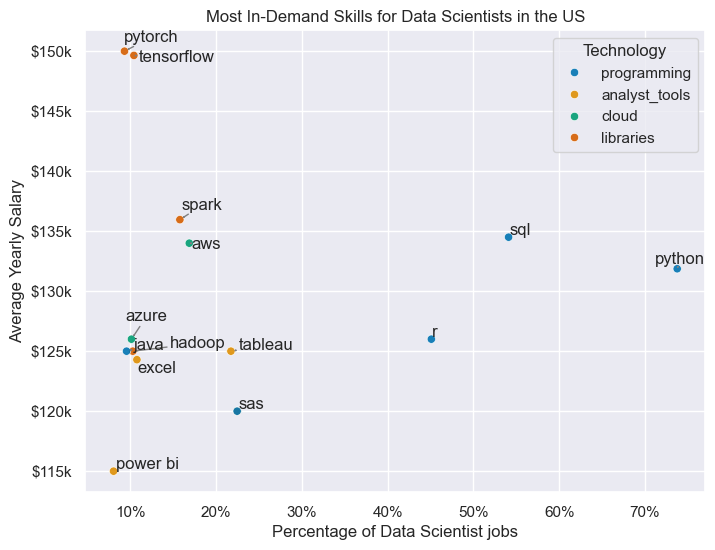

In [22]:
# plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot, 
    x='skills_percent', 
    y='average_pay',
    hue='Technology',
    alpha=0.9
)

texts = []
# Loop through the index of df_skills to get the appropriate text label
for index, txt in enumerate(df_skills.index):
    texts.append(plt.text(df_skills['skills_percent'].iloc[index], df_skills['average_pay'].iloc[index], txt))

# Inserting arrows to avoid text overlap and for better readability
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Add labels and title
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0f}%'))
plt.xlabel('Percentage of Data Scientist jobs')
plt.ylabel('Average Yearly Salary')
plt.title('Most In-Demand Skills for Data Scientists in the US')
plt.show()